## EDA for Ward x Complaint Type Time Series Analysis
Objectives: 
- Find out which Ward x Complaint Type is suitable for modeling using TSM
- Find obvious patterns in the data. In particular, answer what complaint types occur predominatly during which time periods.
- Construct data files to be used in TSM

In [1]:
library(forecast)
library(xts)
library(lubridate)
library(dplyr)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:xts’:

    first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
RAW_PATH = "/home/samarth/workspaces/datakind-workspace/cocUptoJuly2016.csv"

In [3]:
nas <- c(NA, 'NA', '', ' ', 'NULL')
df <- read.csv(RAW_PATH, stringsAsFactors = F,
                    na.strings = nas)


In [4]:
df$Complaint.Date <- as.Date(df$Complaint.Date, format = "%m/%d/%Y")
df$Resolution.Date <- as.Date(df$Resolution.Date, format = "%m/%d/%Y")
df$NumComplaints <- 1

# discard pre-2012 data, and post 2016 data
df <- df[df$Complaint.Date >= as.Date("01/01/2012", format = "%m/%d/%Y"), ] 
df <- df[df$Complaint.Date < as.Date("01/01/2016", format = "%m/%d/%Y"), ] 

In [5]:
head(df)

,X.1,X,Complaint.Type,Area,Locality,Street,Region,Zone,Ward,Complaint.Details,Email,Mobile,Department,Complaint.Date,Resolution.Date,Number.of.days.for.resolution,Range,Is.Resolved,NumComplaints
1,1,1,Mosquito menace,Raja Annamalai Puram,Raja Annamalai Puram,Chamiers Iv Lane,Central Region,N09,N122,PLEASE RECTIFY THE PROBLEM SIR.,00e3902431681886db4cf60de2db9188,f0fbecb87d53088508df2164687a7974,NJ-TEYNAMPET,16679,NA,NA,NA,NO,1
2,2,2,Complaints related to property tax,Mylapore,Mylapore,Justice Sundaram Salai,Central Region,N09,N124,"i remitted the tax arrears of rs 4522 on 21-08-2017 via citi bank card. i have been debited my bank and they confirm the transaction is through. but whereas in the web still it shows as arrears, can you please help me",00e3902431681886db4cf60de2db9188,44c25de05e7654fa0f45741a3391a6d9,NJ-TEYNAMPET,16679,NA,NA,NA,NO,1
3,3,3,Stray cattle,Raja Annamalai Puram,Rohini Garden,Rohini Garden Cross Street,South Region,N13,N173,PLEASE CATCH THE STRAY CATTLE PROBLEM SIR SO PLEASE RECTIFY.,00e3902431681886db4cf60de2db9188,550e0ba50963aa8d8074508918c9fba3,NN-ADYAR,16679,NA,NA,NA,NO,1
4,4,4,Dog menace,Kodungaiyur,K.M Nagar,Perumal St,North Region,N04,N037,SO MANY DOGS ARE HERE SO KINDLY TAKE ACTION SIR.,00e3902431681886db4cf60de2db9188,f0aa1d06f3216e1cc2adef8f8bf1c376,ND-TONDIARPET,16679,NA,NA,NA,NO,1
5,5,5,Desilting of Drain,MADURAVOYAL,KRISHNA NAGAR,KRISHNA NAGAR 24TH STREET,South Region,N11,N147,PLEASE RECTIFY THE PROBLEM.,00e3902431681886db4cf60de2db9188,d1d8af0359f1c13650622e2ceda58886,NL-VALASARAVAKKAM,16679,NA,NA,NA,NO,1
6,6,6,Dog menace,Gopalapuram,Gopalapuram,Ganesh Street,Central Region,N09,N111,SO MANY COWS ARE AROUND IN MY AREA SO PLEASE KINDLY CATCH THAT COWS SIR,00e3902431681886db4cf60de2db9188,e0227e34bff8489fe1c048d0ad97f92b,NJ-TEYNAMPET,16679,NA,NA,NA,NO,1


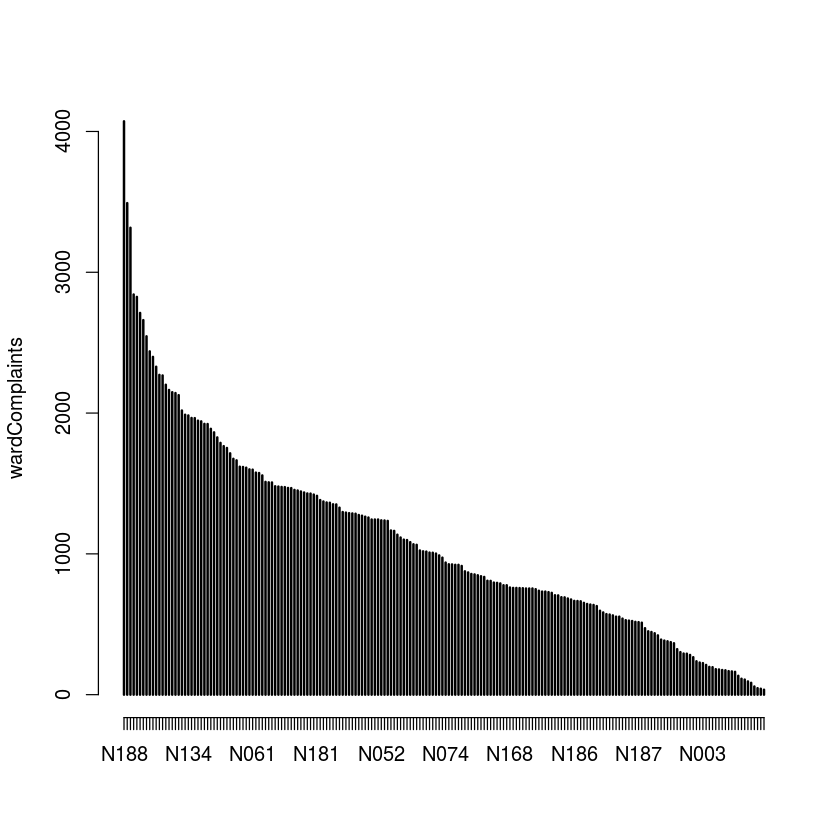

In [6]:
# plot distribution of complaints
wardComplaints <- table(df$Ward)
wardComplaints <- wardComplaints[order(-wardComplaints)]
plot(wardComplaints)

In [7]:
(wardComplaints / nrow(df)) * 100


      N188       N064       N128       N123       N058       N095       N179 
1.86575029 1.59954181 1.51935853 1.30217640 1.29438717 1.24215349 1.21878580 
      N177       N100       N057       N169       N105       N035       N036 
1.16609393 1.11706758 1.09919817 1.06712486 1.04054983 1.03871707 1.00847652 
      N037       N065       N094       N182       N083       N127       N134 
0.99152348 0.98419244 0.98144330 0.97457045 0.92462772 0.91088202 0.90859107 
      N176       N132       N082       N045       N153       N019       N137 
0.90034364 0.89988545 0.89163803 0.88934708 0.88109966 0.88064147 0.86506300 
      N136       N175       N109       N101       N156       N102       N142 
0.85360825 0.83711340 0.81924399 0.80870561 0.80274914 0.78533792 0.76746850 
      N103       N129       N193       N070       N114       N061       N124 
0.76242841 0.74180985 0.74089347 0.73860252 0.73310424 0.73218786 0.72256586 
      N078       N112       N066       N138       N060       N1

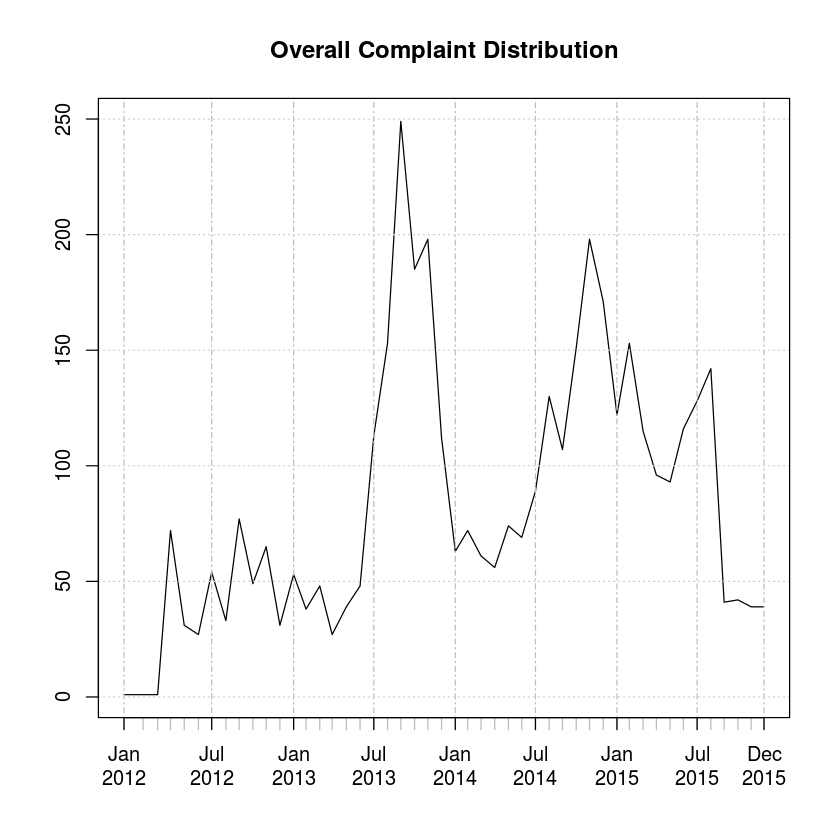

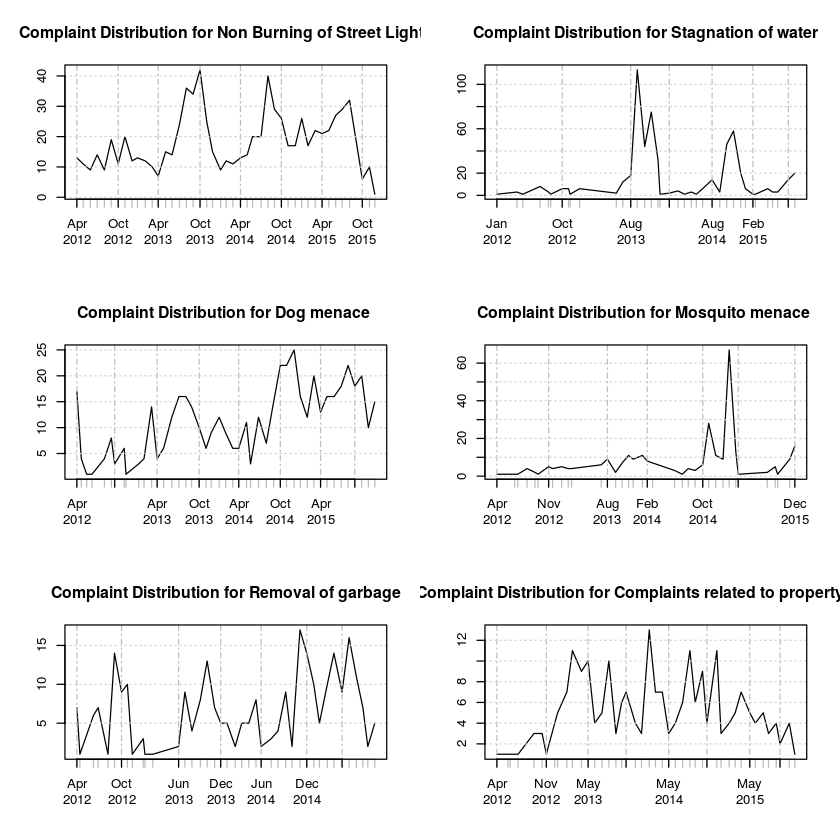

   Month Freq
1     11  500
2      9  474
3      8  458
4     10  427
5      7  384
6     12  353
7      2  264
8      6  260
9      4  251
10     1  239
11     5  237
12     3  225


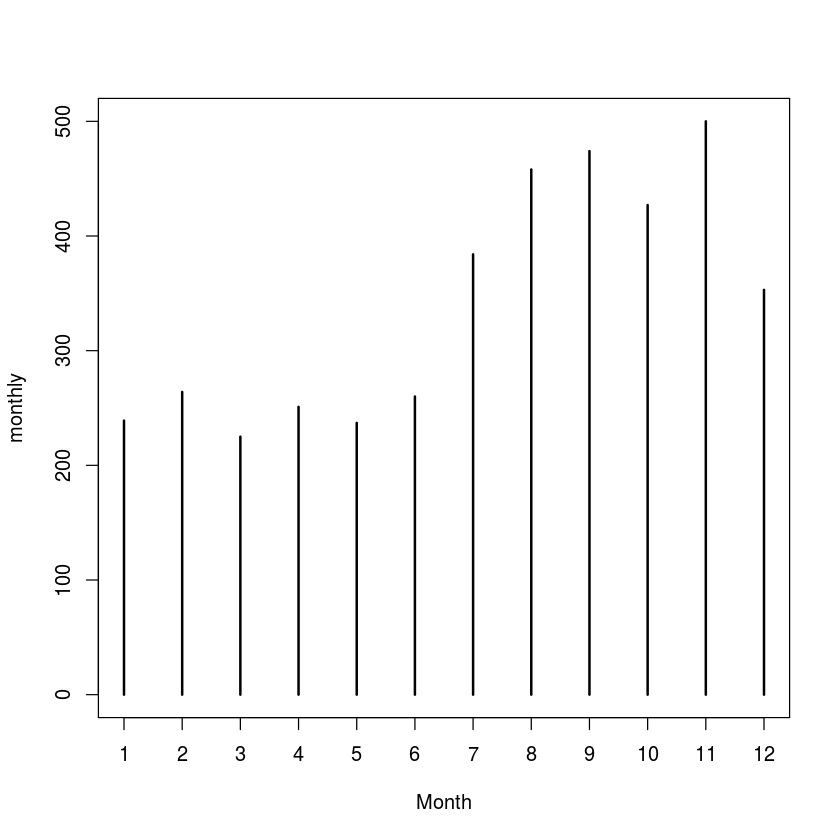

In [8]:
plot.ward.details <- function(df, ward) {
    df <- df[df$Ward == ward, ]
    series <- xts(df$NumComplaints, df$Complaint.Date)
    series <- apply.monthly(series, FUN = sum)    
    plot(series, main="Overall Complaint Distribution")
    
    # plot top 6 complaint types    
    complaintCounts <- table(df$Complaint.Type)
    complaintCounts <- complaintCounts[order(-complaintCounts)]    
    opar <- par(mfrow=c(3,2))
    for(i in 1:6) {
        complaintType <- names(complaintCounts[i])        
        sub <- df[df$Complaint.Type == complaintType, ]        
        series <- xts(sub$NumComplaints, sub$Complaint.Date)
        series <- apply.monthly(series, FUN = sum)    
        plot(series, main=paste0("Complaint Distribution for ", complaintType))
    }
    par(opar)
    
    df$Month <- month(df$Complaint.Date)
    df$Year <- year(df$Complaint.Date)
    
    monthly <- table(Month=df$Month)    
    plot(monthly)
    monthly <- as.data.frame(monthly[order(-monthly)])
    #monthly$Month <- month.abb[monthly$Month]
    print(monthly)    
    yearly <- as.data.frame(table(Month=df$Month, Year=df$Year))
    yearly$Month <- month.abb[yearly$Month]    
}
plot.ward.details(df, "N188")

In [9]:
wards <- unique(df$Ward)
complaintTypes <- unique(df$Complaint.Type)

In [10]:
wardXComplaint <- expand.grid(Ward=wards, complaintType=complaintTypes, stringsAsFactors=F)

In [11]:
constructSeries <- function(df, ward, complaintType) {        
    df <- df[(df$Ward == ward) & (df$Complaint.Type == complaintType), ]    
    if(nrow(df) == 0) {
        return(NULL)
    }
    series <- xts(df$NumComplaints, df$Complaint.Date)
    return(apply.monthly(series, FUN = sum))
}

In [12]:
series <- apply(wardXComplaint[1:nrow(wardXComplaint), ], 1, function(row) constructSeries(df, row["Ward"], row["complaintType"]))

In [14]:
head(series)

ERROR: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[1]]) result is length 0


$`1`
           [,1]
2012-04-26    4
2012-05-30    2
2012-06-20    2
2012-08-31   10
2012-09-20    3
2012-10-22    5
2012-11-22    4
2012-12-11    3
2013-01-29    7
2013-02-20   14
2013-03-31   19
2013-04-19    2
2013-06-30    2
2013-07-29    5
2013-08-23    6
2013-09-26    4
2013-10-25    5
2013-11-30    9
2013-12-09    2
2014-01-28    4
2014-02-23    8
2014-03-28   10
2014-04-03    2
2014-06-27    1
2014-07-31    2
2014-08-19    1
2014-09-20    2
2014-10-24    2
2014-11-29    4
2014-12-25    6
2015-01-31    7
2015-02-28   67
2015-03-27   20
2015-04-12    5
2015-06-12    1
2015-09-05    4
2015-10-30    4
2015-11-27    6
2015-12-30    4

$`2`
           [,1]
2012-05-05    1
2012-06-07    2
2012-07-16    1
2012-10-22    4
2012-11-21    4
2012-12-27    4
2013-01-24    6
2013-02-26    5
2013-03-26    4
2013-04-29    1
2013-08-31    4
2013-09-12    1
2013-10-25    5
2013-11-09    1
2013-12-31    8
2014-01-24   18
2014-02-17    1
2014-03-25    1
2014-04-16    1
2014-05-12    1
2014-10-30   